# Assignment 2
### Understanding Uncertainty
### Due 9/12

1. 'State Bottle Retail' is the price at which the bottle is sold, while 'State Bottle Cost' is the price the state pays for a bottle.
- How do you define the most profitable item? Why? Explain your thinking.
- Use `.groupby` calculations to determine the most profitable liquors sold in Iowa.
- Make a plot of the top liquors.

The most profitable item should be defined as the most amount of difference (profit margin) between the State Bottle Retail and the State Bottle Cost (State Bottle Retail - State Bottle Cost). I say this because the state wants to make as much money back as they can by turning over a higher profit.

In [87]:
import pandas as pd
iowa = pd.read_csv('data/iowa.csv')

In [88]:
iowa['Profit Margin']=((iowa['State Bottle Retail']- iowa['State Bottle Cost'])* iowa['Bottles Sold'])


iowa_profit = ( (iowa.loc[:,['Profit Margin','Item Description']])
         .groupby('Item Description')
         .sum()
         .sort_values(by='Profit Margin',ascending=False))

top_liquor = iowa_profit[:20].copy()
top_liquor['Percent Profit'] = 100 * top_liquor['Profit Margin'] / top_liquor['Profit Margin'].sum()

<Axes: xlabel='Percent Profit', ylabel='Item Description'>

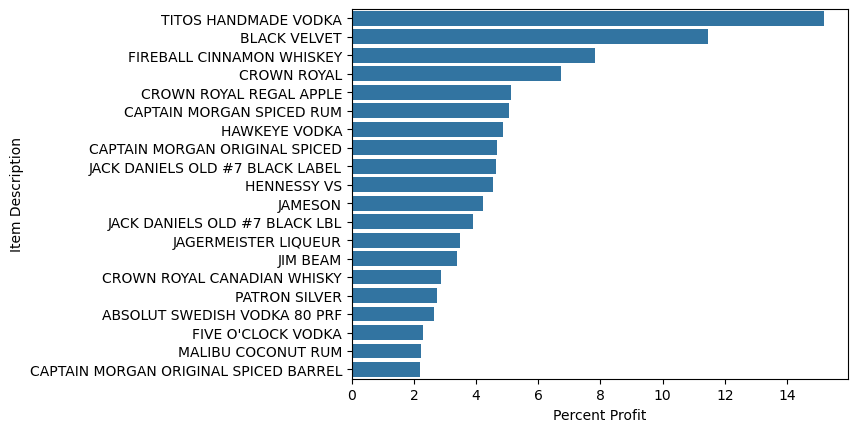

In [89]:
import seaborn as sns

top_items = iowa.nlargest(10, 'Profit Margin')
sns.barplot(y='Item Description', x='Percent Profit', data=top_liquor)

2. This question is to further explore broadcasting in NumPy.

- In the first code chunk below, there are two vectors, $x$ and $y$. What happens when you try to subtract them?
- Instead, try `x.reshape(-1,1)-y.reshape(1,-1)`. What do you get?
- Try `x.reshape(1,-1)-y.reshape(-1,1)`. Compare the results to your previous answer.
- Write two double for-loops to replicate the results of the previous two answers. 
- Clearly explain how `x.reshape(1,-1)` and `x.reshape(-1,1)` change $x$

In [90]:
import numpy as np

x = np.array([1,3,5])
y = np.array([2,5])

When trying to subtract y from x, a ValueError occurred, since the arrays have different shapes (3,) and (2,).

In [91]:
x.reshape(-1,1)-y.reshape(1,-1)

array([[-1, -4],
       [ 1, -2],
       [ 3,  0]])

This code produced a 3x2 matrix, where each row is the result of the values of x minus the 2 values of y.

In [92]:
x.reshape(1,-1)-y.reshape(-1,1)

array([[-1,  1,  3],
       [-4, -2,  0]])

This code produced a 2x3 matrix, where each column is the result of x minus the 2 values of y.

In [93]:
result = np.zeros((len(x), len(y)))

for i in range(len(x)):
    x_row = x.reshape(-1, 1)
    for j in range(len(y)):
        y_col = y.reshape(1, -1)
        result[i, j] = x[i] - y[j]

print(result)

[[-1. -4.]
 [ 1. -2.]
 [ 3.  0.]]


In [94]:
result2 = np.zeros((len(y), len(x)))

for i in range(len(x)):
    x_row = x.reshape(1, -1)
    for j in range(len(y)):
        y_col = y.reshape(-1, 1)
        result2[j, i] = x[i] - y[j]

print(result2)

[[-1.  1.  3.]
 [-4. -2.  0.]]


The first double for loop produced an array in the form of a 3x2 matrix, where each row is the result of the values of x minus the 2 values of y.

3. The indicator function $\mathbb{I}\{ x \le z \}$ takes the value 0 if $x>z$ and 1 if $x \le z$ is true, or
$$
\mathbb{I}\{x \le z\} = \begin{cases}
0, &x > z \\
1, &x \le z
\end{cases}
$$

- For $x = 3$, plot the indicator function for any $z$
- Explain how $ 1- \mathbb{I}\{ x \le z \} = \mathbb{I}\{ x > z \}$. Drawing a plot might help, or looking at the definition given above.
- The code below generates a random sample for different numbers of observations, $N = 3, 30, 300, 3000 $. Write a function to compute the ECDF curve for each sample, and plot your results.
- Describe in your own words what happens to the ECDF qualitatively as the sample size $N$ increases

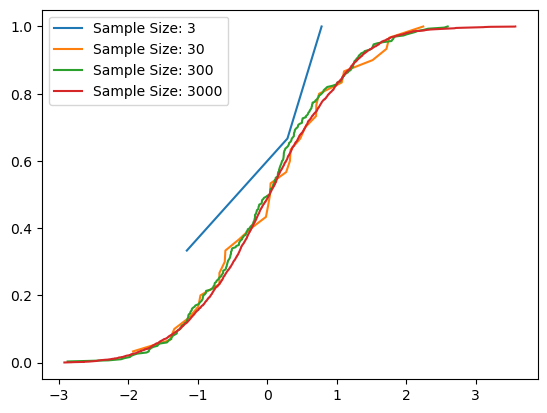

In [95]:
import numpy as np
import seaborn as sns

rng = np.random.default_rng(100)
ecdf_values = [3, 30, 300, 3000]

def ecdf(sample):
    sorted_sample = np.sort(sample)
    n = len(sorted_sample)
    return sorted_sample, np.arange(1, n+1) / n

for N in ecdf_values:
    X = rng.normal(0, 1, N)
    sorted_sample, ecdf_values = ecdf(X)
    sns.lineplot(x=sorted_sample, y=ecdf_values, label=f'Sample Size: {N}')

4. A **quantile** generalizes the concept of the median so that instead of 50% of the mass below and 50% above, the $q$-quantile is the value for which $q$ proportion of the data are below that value and $(1-q)$ proportion of the data are above that value. This is a concept of **order**.

- Write a function that computes any quantile without using Numpy's `np.quantile`
- Write a function that computes the **Interquartile Range (IQR)** -- the .25 quantile and the .75 quantile, which brackets 50% of the data -- and the **whiskers**: $\pm 1.5 \times \text{IQR}$ from the edges of the IQR
- Write a function that computes a five-number summary and values for a boxplot: the minimum, the .25 quantile, the median, the .75 quantile, and the maximum, and the whiskers
- Anything outside the whiskers is an **outlier**; write a function that returns a Boolean vector indicating if the observations are outliers.
- For a numeric variable of your choice from one of the datasets, apply your functions from above, and compare your answers with `sns.boxplot` and `df.describe`. 

The 65.0th quantile of Bottles Sold is 12.
The inter-quartile range (iqr) of Bottles Sold has whiskers -10.5 and 25.5, with 9 in the middle of the iqr.
The minimum value is -60, the 25th quantile is 3, the median is 6, the 75th quantile is 12, and the maximum value is 2400.
Observation 60 is NOT an outlier.


count    159904.000000
mean         10.883336
std          28.042635
min         -60.000000
25%           3.000000
50%           6.000000
75%          12.000000
max        2400.000000
Name: Bottles Sold, dtype: float64

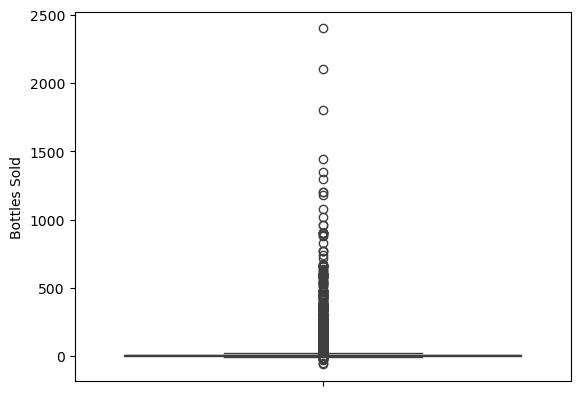

In [ ]:
import math

# Any quantile compution:

def quantile(q, data):
    sorted_data = np.sort(np.ravel(data))
    n = len(sorted_data)
    index = int(math.floor(q * (n - 1)))
    return sorted_data[index]

# Interquartile Range compution:

def compute_iqr(data):
    q1 = quantile(0.25, data)
    q3 = quantile(0.75, data)
    iqr = q3 - q1
    whisker_lower = q1 - 1.5 * iqr
    whisker_upper = q3 + 1.5 * iqr
    return iqr, whisker_lower, whisker_upper

# Five-number summary:

def five_number_summary(data):
    min_value = np.min(data)
    q1 = quantile(0.25, data)
    median = quantile(0.5, data)
    q3 = quantile(0.75, data)
    max_value = np.max(data)
    return min_value, q1, median, q3, max_value

# Outlier:

def is_outlier(data):
    iqr, whisker_lower, whisker_upper = compute_iqr(data)
    return (data < whisker_lower) | (data > whisker_upper)


# Example: Bottles Sold
q = 0.65

print(f"The {q*100}th quantile of Bottles Sold is {quantile(q, iowa["Bottles Sold"])}.")

iqr, whisker_lower, whisker_upper = compute_iqr(iowa["Bottles Sold"])

print(f"The inter-quartile range (iqr) of Bottles Sold has whiskers {whisker_lower} and {whisker_upper}, with {iqr} in the middle of the iqr.")

min_value, q1, median, q3, max_value = five_number_summary(iowa["Bottles Sold"])

five_number_summary(iowa["Bottles Sold"])
print(f"The minimum value is {min_value}, the 25th quantile is {q1}, the median is {median}, the 75th quantile is {q3}, and the maximum value is {max_value}.")


random_value = np.random.default_rng(159904)

random_index = random_value.integers(0, len(iowa))

random_observation = iowa.loc[random_index, "Bottles Sold"]


if is_outlier(random_observation) == True:
    print(f"Observation {random_observation} is an outlier.")
else:
    print(f"Observation {random_observation} is NOT an outlier.")

sns.boxplot(data=iowa["Bottles Sold"])

iowa['Bottles Sold'].describe()

My functions correctly describe the Bottles Sold variable.

5. The kernel density estimator captures the concentration of the data around various points, and is defined as
$$
\hat{f}_{N,h}(z) = \frac{1}{N} \sum_{i=1}^N \frac{1}{h} k \left( \frac{x_i - z}{h}\right)
$$
where $h$ is the bandwidth and $k()$ is one of the kernel functions from the class materials (Gaussian, Epanechnikov, uniform, triangular).

- Write a function that takes the bandwidth $h$ as given, and computes and plots $\hat{f}_{N,h}(z)$, for the kernels listed in the slides
- Write a function that computes the plug-in bandwidth
- Use your functions to analyze some numeric variables from a dataset of your choice, using a variety of bandwidths
- Compare bandwidths that are greater or less than the plug-in value with the results for the plug-in value. When does the KDE appear to be overfitting? Underfitting?